In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Question 3: Discrete Random Sampling

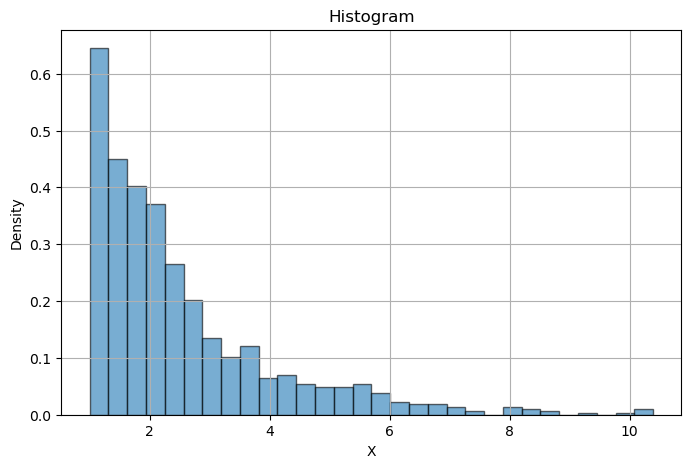

In [2]:
# parameters
n = 1000
U = np.random.uniform(0, 1, size=n)
X_cont = 1 - np.log2(1 - U)

# histogram
plt.figure(figsize=(8,5))
plt.hist(X_cont, bins=30, density=True, alpha=0.6, edgecolor='k')
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Histogram')
plt.grid(True)
plt.show()

### Question 4: Inverse Transform Sampling

Sample size: 1000
Sample mean: 2.4641367360102184
Sample std: 1.4905162311111655


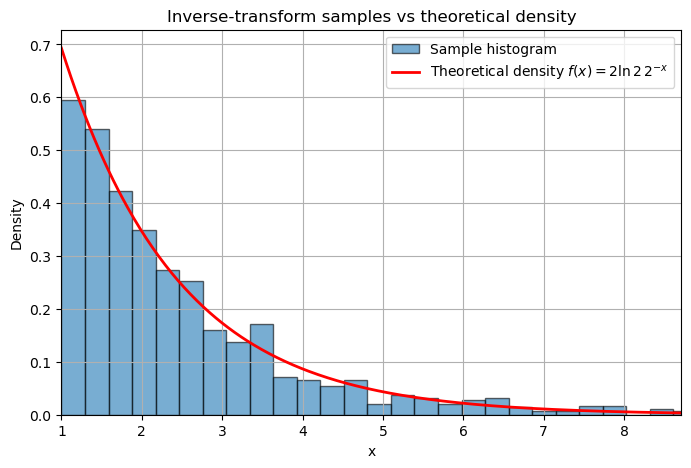

In [3]:
# parameters
n = 1000
rng = np.random.default_rng(2025)   

# constants
ln2 = np.log(2.0)
C = 2.0 * ln2   # C = 2 ln 2

# inverse-CDF sampling
U = rng.random(n)                   
X = 1.0 - np.log(1.0 - U) / ln2       

# print results
print("Sample size:", len(X))
print("Sample mean:", np.mean(X))
print("Sample std:", np.std(X, ddof=1))

# plot histogram 
xs = np.linspace(1.0, np.max(X) + 1.0, 500)
f_x = C * 2.0 ** (-xs)  

plt.figure(figsize=(8,5))
plt.hist(X, bins=30, density=True, alpha=0.6, edgecolor='k', label='Sample histogram')
plt.plot(xs, f_x, 'r-', lw=2, label='Theoretical density $f(x)=2\\ln2\\,2^{-x}$')
plt.xlim(1, np.percentile(X, 99.5))
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Inverse-transform samples vs theoretical density')
plt.legend()
plt.grid(True)
plt.show()


### Question 5: Simulation of Bivariate Normal Distribution

Sample mean: [4.04939781 2.20539895]
Sample covariance:
 [[1.01096604 2.07697091]
 [2.07697091 9.35043087]]


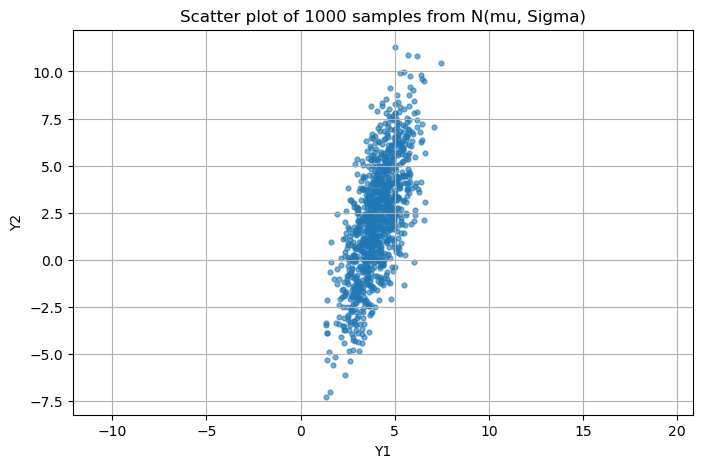

In [4]:
def cholesky_decomposition(A):
    """
    Computes the Cholesky decomposition of a symmetric positive definite matrix A.
    
    Parameters
    ----------
    A : list of lists or 2D array
        Symmetric positive definite matrix to decompose.
    
    Returns
    -------
    L : np.ndarray
        Lower triangular matrix from the Cholesky decomposition.
    """
    # initialize an n x n zero matrix to store the lower triangular factor L
    n = len(A) 
    L = [[0.0 for _ in range(n)] for _ in range(n)]
    
    # iterate over each row of the matrix
    for i in range(n):
        
        # compute the off-diagonal entries of L (columns before the diagonal)
        for j in range(i):
            # compute the summation term
            sum_val = sum(L[i][k] * L[j][k] for k in range(j))
            
            # compute L[i,j] according to the Cholesky formula
            L[i][j] = (A[i][j] - sum_val) / L[j][j]
        
        # compute the diagonal entry L[i,i]
        sum_val = sum(L[i][k] ** 2 for k in range(i))
        
        # take the square root to obtain the diagonal element
        L[i][i] = math.sqrt(A[i][i] - sum_val)
    
    # convert the list of lists to a NumPy array for easier numerical operations
    return np.array(L)


# parameters
A = [[1, 2], [2, 9]]
mu = np.array([4, 2])
n = 1000

# compute Cholesky factor
L = cholesky_decomposition(A)

# generate standard normals
Z = np.random.standard_normal(size=(n, 2))

# transform to get Y = L Z + mu
Y = Z @ L.T + mu

# sample statistics
sample_mean = np.mean(Y, axis=0)
sample_cov = np.cov(Y, rowvar=False, ddof=1)
print("Sample mean:", sample_mean)
print("Sample covariance:\n", sample_cov)

# scatter plot
plt.figure(figsize=(8,5))
plt.scatter(Y[:,0], Y[:,1], s=12, alpha=0.6)
plt.xlabel('Y1')
plt.ylabel('Y2')
plt.title('Scatter plot of 1000 samples from N(mu, Sigma)')
plt.grid(True)
plt.axis('equal')
plt.show()